In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [8]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1


In [9]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,0.414439
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,0.493285
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,0.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,0.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,0.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,1.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 38.1+ KB


<Axes: >

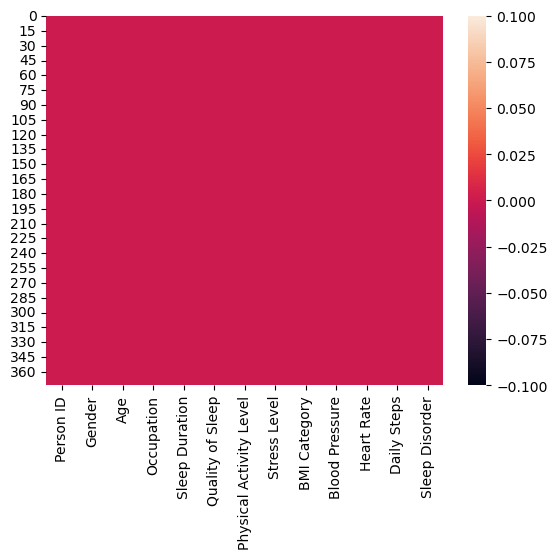

In [11]:
sns.heatmap(data.isnull())

C:\Users\user\AppData\Local\Temp\ipykernel_9160\703301637.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

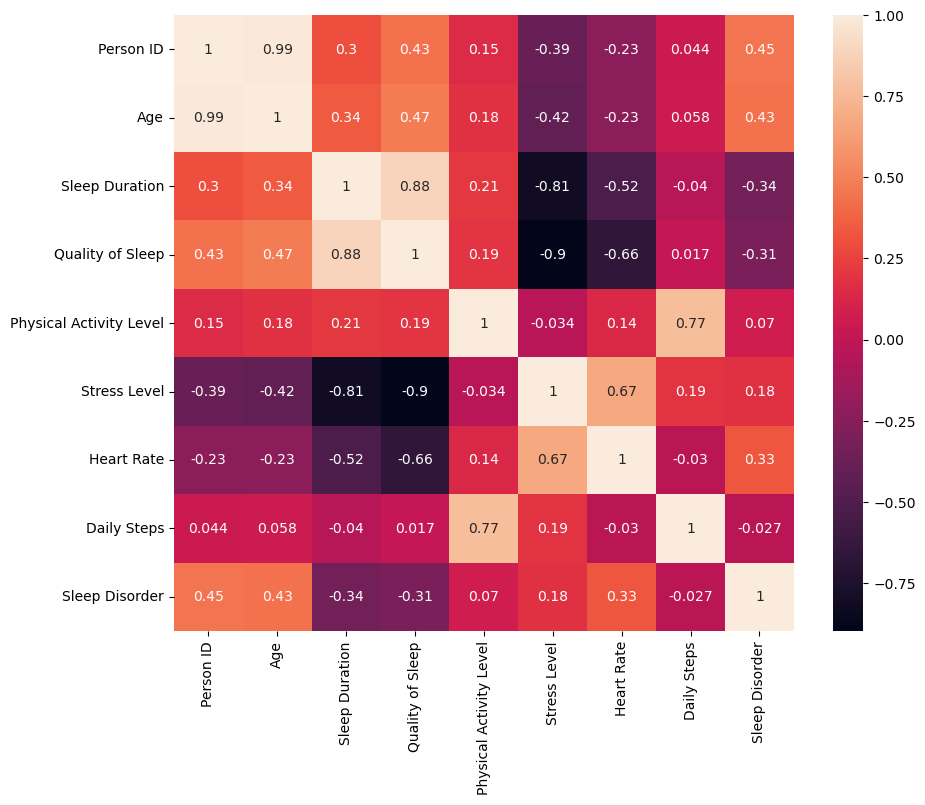

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)

In [24]:
models = data.groupby('Occupation').count()[['Age']].sort_values(by='Age',ascending=True).reset_index()
models = models.rename(columns={'Age':'Stress Level'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Manager'),
  Text(1, 0, 'Sales Representative'),
  Text(2, 0, 'Scientist'),
  Text(3, 0, 'Software Engineer'),
  Text(4, 0, 'Salesperson'),
  Text(5, 0, 'Accountant'),
  Text(6, 0, 'Teacher'),
  Text(7, 0, 'Lawyer'),
  Text(8, 0, 'Engineer'),
  Text(9, 0, 'Doctor'),
  Text(10, 0, 'Nurse')])

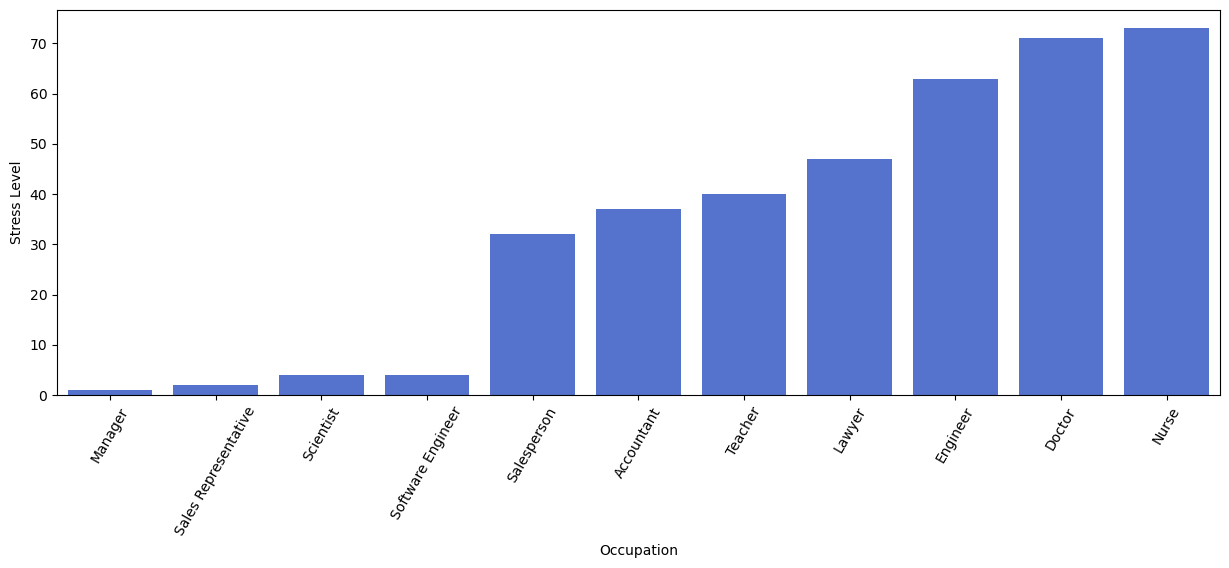

In [25]:
fig= plt.figure(figsize=(15,5))
sns.barplot(x=models['Occupation'], y=models['Stress Level'], color='royalblue')
plt.xticks(rotation=60)

C:\Users\user\AppData\Local\Temp\ipykernel_9160\2653563238.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sleep Duration'])


<Axes: xlabel='Sleep Duration', ylabel='Density'>

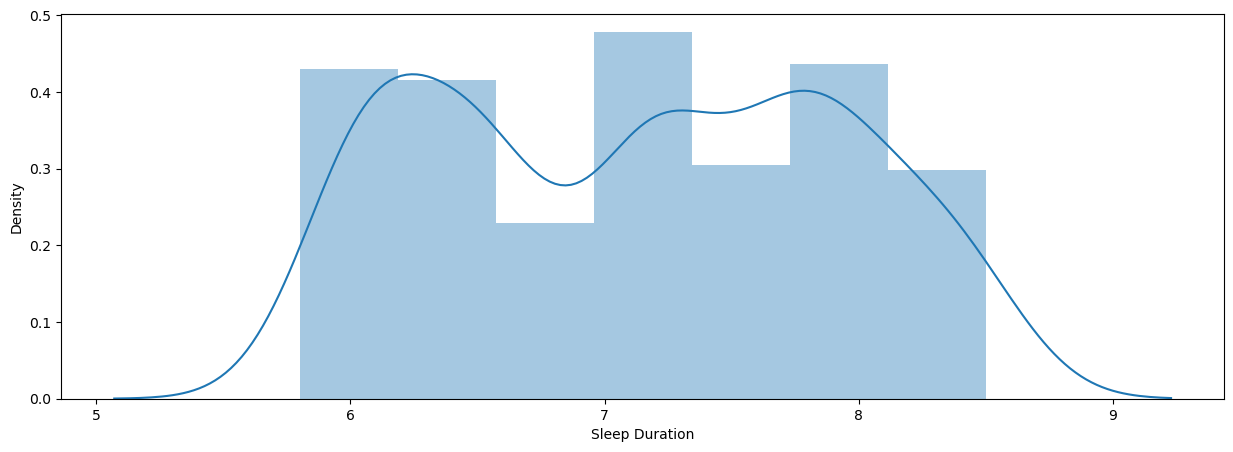

In [27]:
plt.figure(figsize=(15,5))
sns.distplot(data['Sleep Duration'])

C:\Users\user\AppData\Local\Temp\ipykernel_9160\1733773943.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Quality of Sleep'])


<Axes: xlabel='Quality of Sleep', ylabel='Density'>

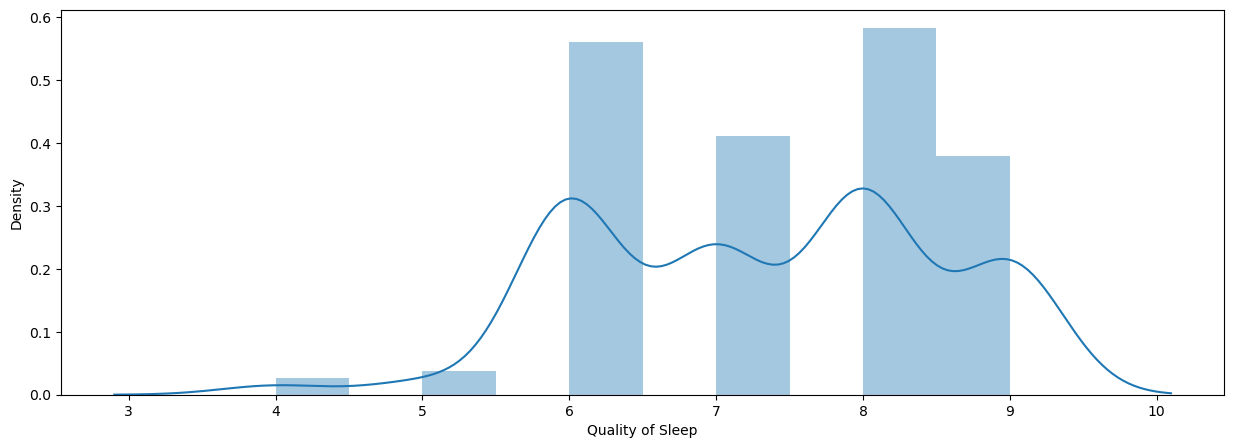

In [28]:
plt.figure(figsize=(15,5))
sns.distplot(data['Quality of Sleep'])

In [30]:
data['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

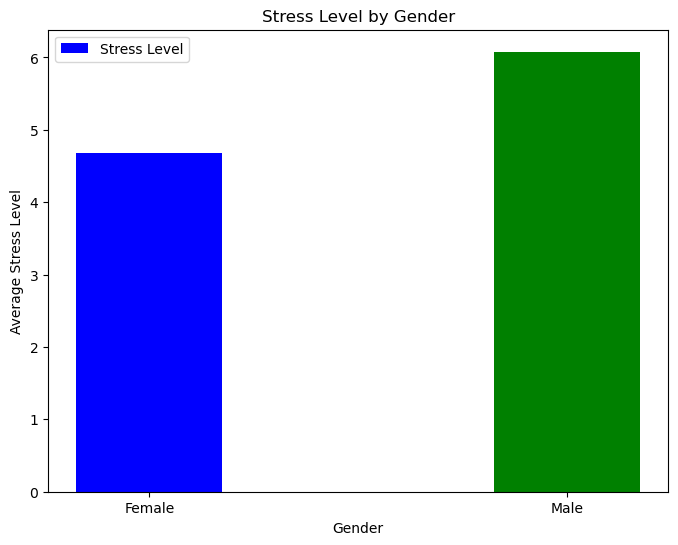

In [32]:
gender_stress = data.groupby('Gender')['Stress Level'].mean()
x = np.arange(len(gender_stress))
width = 0.35
plt.figure(figsize=(8, 6))
plt.bar(x, gender_stress, width, label='Stress Level', color=['blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Average Stress Level')
plt.title('Stress Level by Gender')
plt.xticks(x, gender_stress.index)
plt.legend()
plt.show()

In [48]:
features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
x = data[features]
y = data['Sleep Disorder']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [51]:
print(x.shape, x_train.shape, x_test.shape)

(374, 7) (299, 7) (75, 7)


In [52]:
print(y.shape, y_train.shape, y_test.shape)

(374,) (299,) (75,)


In [53]:
model = LogisticRegression()
model.fit(x_test,y_test)

c:\Users\user\anaconda.3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [55]:
print('Akurasi data training dengan model logistic regression adalah =',training_data_accuracy)

Akurasi data training dengan model logistic regression adalah = 0.903010033444816


In [56]:
x_test_predict = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_predict, y_test)

In [57]:
print('Akurasi data testing menggunakan model logistic regression adalah =', testing_data_accuracy)

Akurasi data testing menggunakan model logistic regression adalah = 0.9333333333333333


In [59]:
input_data =(28, 5.9, 4, 30, 8, 85, 3000)
dataasarray = np.asarray(input_data)
reshape = dataasarray.reshape(1, -1)
prediction = model.predict(reshape)
print(prediction)

if(prediction[0]==0):
    print('Pasien Tidak Menderita Gangguan Tidur')
else:
    print('Pasien Menderita Gangguan Tidur')

[1]
Pasien Menderita Gangguan Tidur


c:\Users\user\anaconda.3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
filename = 'gangguantidur.sav'
pickle.dump(model, open(filename, 'wb'))